# Preparation

In [1]:
#encoding:utf-8
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xlrd
import numpy as np
import pandas as pd
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict, learning_curve
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from sklearn.utils import shuffle  
warnings.filterwarnings("ignore")

In [2]:
#loading files
excelFile1 = r'user_item_pair_train_ZP.xlsx'
excelFile2 = r'user_item_pair_train_XCQ.xlsx'
excelFile3 = r'user_item_pair_test_ZP.xlsx'
excelFile4 = r'user_item_pair_test_XCQ.xlsx'
df1 = pd.DataFrame(pd.read_excel(excelFile1))
df2 = pd.DataFrame(pd.read_excel(excelFile2))
df3 = pd.DataFrame(pd.read_excel(excelFile3))
df4 = pd.DataFrame(pd.read_excel(excelFile4))

In [86]:
df2 = df2.drop(columns=['label','user_id','item_id','time','Unnamed: 0'])
df4 = df4.drop(columns=['label','user_id','item_id','time','Unnamed: 0'])
df2.head()

,id,2_item_buy,2_item_view,2_item_collect,2_item_add,2_item_buy_view,2_item_buy_collect,2_item_buy_add,2_item_buypeople,2_item_viewpeople,...,4_geo_buy_collect,4_geo_buy_add,6_UI_useritemview,6_UI_useritemcollect,6_UI_useritemcart,6_UI_useritembuy,6_UI_useritemview_usertotalview,6_UI_useritemcollect_usertotalcollect,6_UI_useritemcart_usertotalcart,6_UI_useritembuy_usertotalbuy
0,1,1,29,0,0,0.034483,0.0,0.0,0,1,...,0.000000,0.393204,1,0,0,0,1.00,0.0,0.0,0.00
1,2,1,29,0,0,0.034483,0.0,0.0,1,3,...,0.491037,0.356335,3,0,0,1,0.75,0.0,0.0,0.25
2,3,1,29,0,0,0.034483,0.0,0.0,0,1,...,0.491037,0.356335,1,0,0,0,1.00,0.0,0.0,0.00
3,4,1,29,0,0,0.034483,0.0,0.0,1,6,...,0.000000,0.393204,3,0,0,0,1.00,0.0,0.0,0.00
4,5,1,29,0,0,0.034483,0.0,0.0,0,1,...,0.491037,0.356335,1,0,0,0,1.00,0.0,0.0,0.00


In [111]:
train = pd.merge(df1,df2,left_index=True,right_index=True,how='outer')
test = pd.merge(df3,df4,left_index=True,right_index=True,how='outer')

In [112]:
train = train.dropna(how='all')
test = train.dropna(how='all')

In [113]:
train = shuffle(train)  
test = shuffle(test)

In [114]:
train.head()

,user_id,item_id,label,time,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,...,4_geo_buy_collect,4_geo_buy_add,6_UI_useritemview,6_UI_useritemcollect,6_UI_useritemcart,6_UI_useritembuy,6_UI_useritemview_usertotalview,6_UI_useritemcollect_usertotalcollect,6_UI_useritemcart_usertotalcart,6_UI_useritembuy_usertotalbuy
121782,104258353,317235270,0,2014-12-17,409,130,405,0,0,4,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
365649,110801380,117698222,0,2014-12-17,493,232,439,45,5,4,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
114985,104066491,353827589,0,2014-12-16,469,172,461,3,3,2,...,0.484549,0.325311,2,0,0,0,1.0,0.0,0.0,0.0
385913,111155425,53588648,0,2014-12-11,663,318,660,1,1,1,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
291485,108927293,32041860,0,2014-12-11,664,299,633,19,8,4,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0


In [115]:
test.head()

,user_id,item_id,label,time,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,...,4_geo_buy_collect,4_geo_buy_add,6_UI_useritemview,6_UI_useritemcollect,6_UI_useritemcart,6_UI_useritembuy,6_UI_useritemview_usertotalview,6_UI_useritemcollect_usertotalcollect,6_UI_useritemcart_usertotalcart,6_UI_useritembuy_usertotalbuy
166373,105618998,230598911,0,2014-12-17,953,350,839,30,81,3,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
350856,110581771,19777740,0,2014-12-10,2783,1093,2379,335,44,25,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
96308,1031737,362143147,0,2014-12-10,163,98,162,0,1,0,...,0.373402,0.272083,2,0,0,0,1.0,0.0,0.0,0.0
228591,107546486,396180889,0,2014-12-10,161,86,160,1,0,0,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
242697,108034286,125828023,0,2014-12-10,752,243,690,1,50,11,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0


In [116]:
train = train.drop(columns=['user_id','item_id','time'])
test = test.drop(columns=['user_id','item_id','time'])
train.head()
test.head()

,label,1_user activity,1_number of items related,1_number of browsing actions,1_number of collecting actions,1_number of carting actions,1_number of buying actions,1_behavior pattern,1_ratio of browsing actions,1_ratio of collecting actions,...,4_geo_buy_collect,4_geo_buy_add,6_UI_useritemview,6_UI_useritemcollect,6_UI_useritemcart,6_UI_useritembuy,6_UI_useritemview_usertotalview,6_UI_useritemcollect_usertotalcollect,6_UI_useritemcart_usertotalcart,6_UI_useritembuy_usertotalbuy
166373,0,953,350,839,30,81,3,0,0.880378,0.031480,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
350856,0,2783,1093,2379,335,44,25,0,0.854833,0.120374,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
96308,0,163,98,162,0,1,0,-1,0.993865,0.000000,...,0.373402,0.272083,2,0,0,0,1.0,0.0,0.0,0.0
228591,0,161,86,160,1,0,0,-1,0.993789,0.006211,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0
242697,0,752,243,690,1,50,11,0,0.917553,0.001330,...,0.000000,0.000000,0,0,0,0,0.0,0.0,0.0,0.0


In [118]:
#standardization
y_train = train.label
X_train = train.drop(columns=['label'])
y_test = test.label
X_test = test.drop(columns=['label'])

In [119]:
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

In [120]:
#standardization
y_train = train.label
X_train = train.drop(columns=['label'])
y_test = test.label
X_test = test.drop(columns=['label'])
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [121]:
#over&down sampling
data1 = train[train['label'] == 1]  # minority (buy) in data1
data0 = train[train['label'] == 0]  # majority (not buy) in data0
oversample = data1.sample(frac=6, replace=True)
downsample = data0.sample(frac=0.3, replace=True)
sample = oversample.append(downsample)
X_train=sample.drop(columns=['label'])
y_train=sample.label

In [122]:
k=y_train.shape[0]
print(k)

136431


# Lasso + LR

In [144]:
lr = LogisticRegression(penalty='l1',C=0.0000085)
lr = lr.fit(X_train, y_train)
print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
lr.coef_[lr.coef_!=0].shape # check the number of the features with non-zero weights

Training accuracy: 0.921630714427073
Test accuracy: 0.5888085604795313


(5,)

In [145]:
print('Five most important features:',X_train.columns[np.where(lr.coef_[0]!=0),])

Five most important features: Index([['1_user activity', '1_number of items related', '1_first time online', '2_item_view', '4_geo_view']], dtype='object')


In [146]:
lr.coef_[0][lr.coef_[0]!=0,]

array([ 2.44411201e-03, -8.29595047e-03, -2.97092815e-02, -1.44161401e-04,
       -4.71543064e-06])

# PCA + LR

In [126]:
#the function below is to plot the explained variance of pca
def plt_pca(X):   
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    tot = sum(eigen_vals)
    var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    plt.figure(figsize = (10, 8), dpi = 300)
    plt.bar(range(1, 1+len(var_exp)), var_exp, alpha=0.6, align='center',label='explained variance')
    plt.step(range(1, 1+len(var_exp)), cum_var_exp, where='mid',label='cumulative variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component number')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('Explained variance of pca')

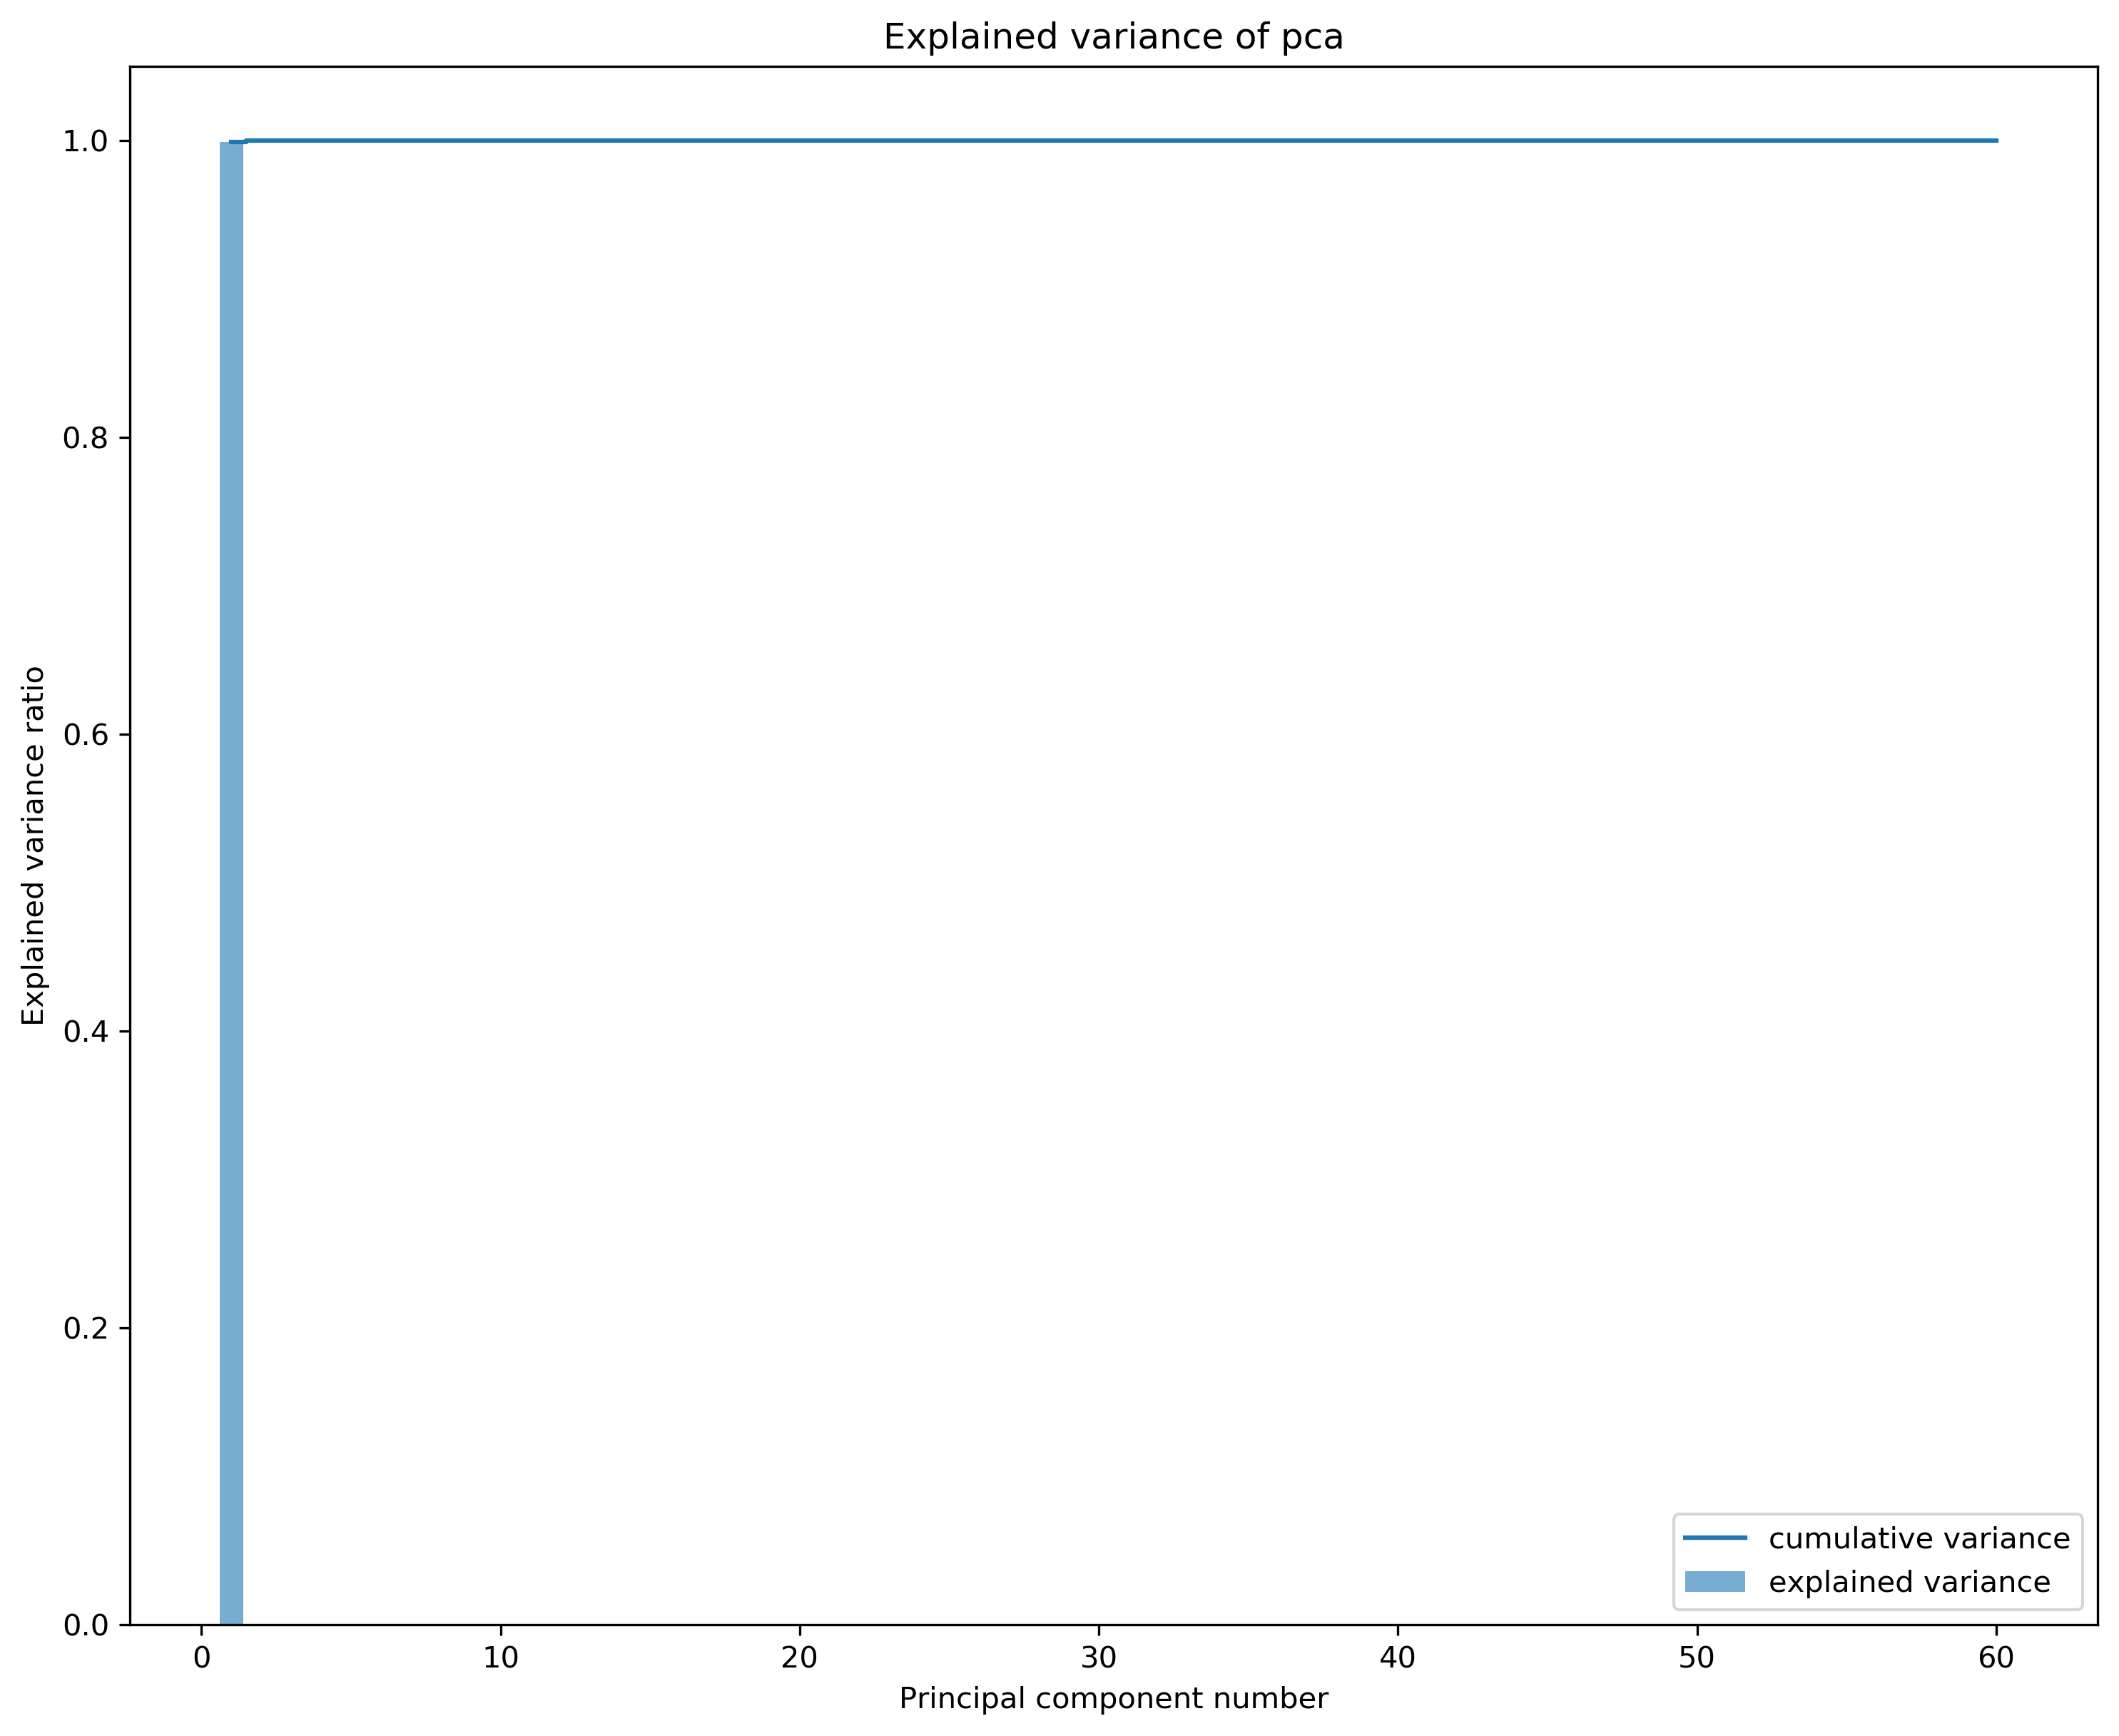

In [127]:
plt_pca(X_train)

In [128]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print("X_train_pca.shape: {}".format(X_train_pca.shape))
print("PCA components:\n{}".format(pca.components_))

X_train_pca.shape: (136431, 1)
PCA components:
[[-2.49504568e-03 -9.34942059e-04 -2.21872980e-03 -1.83693498e-04
  -8.59786516e-05 -6.64372841e-06  3.36450326e-08  1.30401103e-07
  -1.09652916e-07 -1.84665101e-08 -2.28167706e-09 -3.98603762e-06
  -4.53320555e-07 -4.25846434e-09 -7.38668295e-06  1.44671146e-05
  -2.18537976e-05  6.50034943e-07 -1.23805828e-04 -7.24466594e-06
  -2.13367419e-04 -1.25658504e-07 -1.67720928e-06 -2.52058730e-08
  -1.58433229e-08 -2.94876278e-05  5.53331332e-05  5.75435882e-03
   2.02972593e-04  2.07929155e-04  1.24096710e-07  1.18916518e-05
   3.53041739e-06  9.50058869e-07  4.32594664e-05  1.18407628e-06
   2.29077938e-06  1.77408895e-07  7.81107006e-08  5.67765420e-07
   1.12664563e-07  1.12080117e-05  2.60470401e-07  3.80619600e-07
   9.99150528e-01  2.25964179e-02  3.24144154e-02  9.57079215e-03
   1.05991681e-07  1.12262017e-07  2.03890086e-06  3.26595450e-06
   4.03374309e-05  1.13414170e-06  2.22969632e-06  9.22012198e-07
   1.12067091e-05  2.60170068

In [129]:
print(pca.explained_variance_ratio_)

[0.99915853]


In [131]:
feature_names = X_train.columns.values

In [132]:
pca.components_

array([[-2.49504568e-03, -9.34942059e-04, -2.21872980e-03,
        -1.83693498e-04, -8.59786516e-05, -6.64372841e-06,
         3.36450326e-08,  1.30401103e-07, -1.09652916e-07,
        -1.84665101e-08, -2.28167706e-09, -3.98603762e-06,
        -4.53320555e-07, -4.25846434e-09, -7.38668295e-06,
         1.44671146e-05, -2.18537976e-05,  6.50034943e-07,
        -1.23805828e-04, -7.24466594e-06, -2.13367419e-04,
        -1.25658504e-07, -1.67720928e-06, -2.52058730e-08,
        -1.58433229e-08, -2.94876278e-05,  5.53331332e-05,
         5.75435882e-03,  2.02972593e-04,  2.07929155e-04,
         1.24096710e-07,  1.18916518e-05,  3.53041739e-06,
         9.50058869e-07,  4.32594664e-05,  1.18407628e-06,
         2.29077938e-06,  1.77408895e-07,  7.81107006e-08,
         5.67765420e-07,  1.12664563e-07,  1.12080117e-05,
         2.60470401e-07,  3.80619600e-07,  9.99150528e-01,
         2.25964179e-02,  3.24144154e-02,  9.57079215e-03,
         1.05991681e-07,  1.12262017e-07,  2.03890086e-0

Text(0, 0.5, 'principal components')

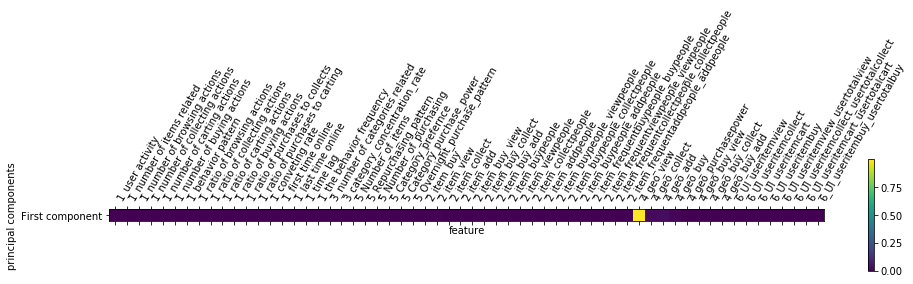

In [133]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0], ["First component"])
plt.colorbar()
plt.xticks(range(len(feature_names)),feature_names, rotation=60, ha='left')
plt.xlabel("feature")
plt.ylabel("principal components")

In [134]:
pipe_lr = make_pipeline(pca,LogisticRegression(random_state=1))
pipe_lr = pipe_lr.fit(X_train, y_train)
print('Training accuracy:', pipe_lr.score(X_train, y_train))
print('Test Accuracy:', pipe_lr.score(X_test, y_test))

Training accuracy: 0.921630714427073
Test Accuracy: 0.995766325897874


# Random Forest & Gradient Boosting

In [135]:
rfc = RandomForestClassifier(n_estimators=100)
rfc = rfc.fit(X_train,y_train)
print('Training accuracy:', rfc.score(X_train, y_train))
print('Test Accuracy:', rfc.score(X_test, y_test))

Training accuracy: 0.9895331706137168
Test Accuracy: 0.9902259622580546


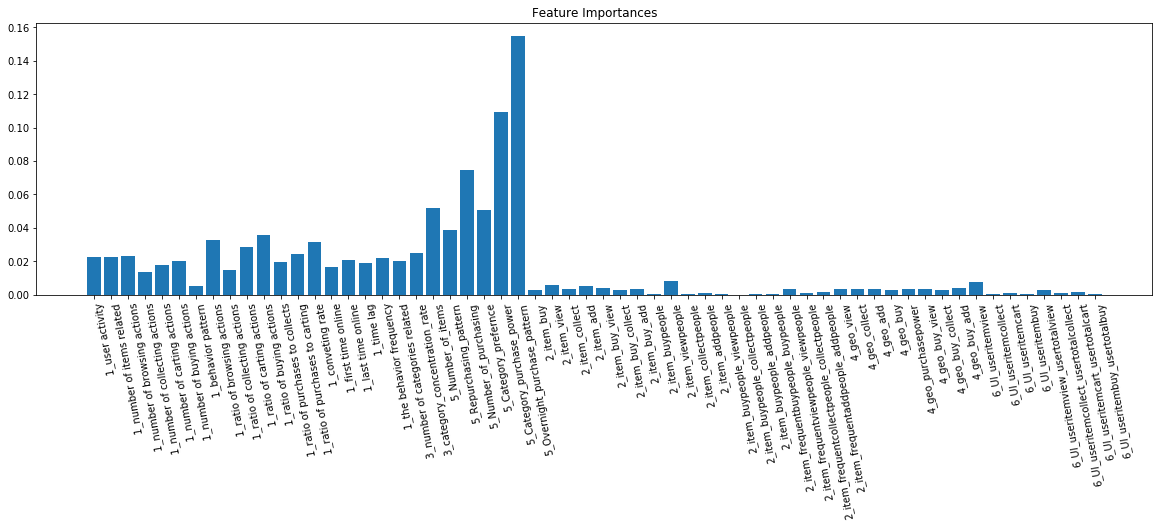

In [136]:
f, ax = plt.subplots(figsize=(20, 5))
ax.bar(range(len(rfc.feature_importances_)),rfc.feature_importances_)
plt.xticks(range(len(feature_names)),feature_names, rotation=100, ha='left')
ax.set_title("Feature Importances")
f.show()

In [137]:
gbc = GradientBoostingClassifier()
gbc = gbc.fit(X_train,y_train)
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test Accuracy:', gbc.score(X_test, y_test))

Training accuracy: 0.9629922818127845
Test Accuracy: 0.9878454115002934


# Validation

In [138]:
# F-1 score for Lasso+LR
y_train_pred1 = cross_val_predict(lr, X_train, y_train, cv=5)
f1 = f1_score(y_train, y_train_pred1)
p1 = precision_score(y_train, y_train_pred1)
r1 = recall_score(y_train, y_train_pred1)
print("F1 Score: {0:.2%}".format(f1))
print("precision: {0:.2%}".format(p1))
print("recall: {0:.2%}".format(r1))

F1 Score: 0.00%
precision: 0.00%
recall: 0.00%


In [139]:
# F-1 score for pca+LR
y_train_pred2 = cross_val_predict(pipe_lr, X_train, y_train, cv=5)
f2 = f1_score(y_train, y_train_pred2)
p2 = precision_score(y_train, y_train_pred2)
r2 = recall_score(y_train, y_train_pred2)
print("F1 Score: {0:.2%}".format(f2))
print("precision: {0:.2%}".format(p2))
print("recall: {0:.2%}".format(r2))

F1 Score: 0.00%
precision: 0.00%
recall: 0.00%


In [140]:
# F-1 score for RF
y_train_pred3 = cross_val_predict(rfc, X_train, y_train, cv=5)
f3 = f1_score(y_train, y_train_pred3)
p3 = precision_score(y_train, y_train_pred3)
r3 = recall_score(y_train, y_train_pred3)
print("F1 Score: {0:.2%}".format(f3))
print("precision: {0:.2%}".format(p3))
print("recall: {0:.2%}".format(r3))

F1 Score: 92.72%
precision: 89.44%
recall: 96.25%


In [141]:
# F-1 score for GBC
y_train_pred4 = cross_val_predict(gbc, X_train, y_train, cv=5)
f4 = f1_score(y_train, y_train_pred4)
p4 = precision_score(y_train, y_train_pred4)
r4 = recall_score(y_train, y_train_pred4)
print("F1 Score: {0:.2%}".format(f4))
print("precision: {0:.2%}".format(p4))
print("recall: {0:.2%}".format(r4))

F1 Score: 73.82%
precision: 84.21%
recall: 65.71%


<Figure size 3000x1800 with 0 Axes>

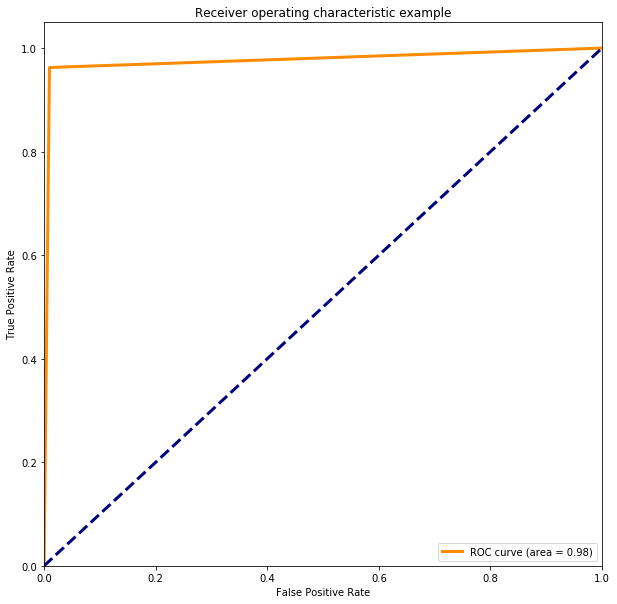

<Figure size 3000x1800 with 0 Axes>

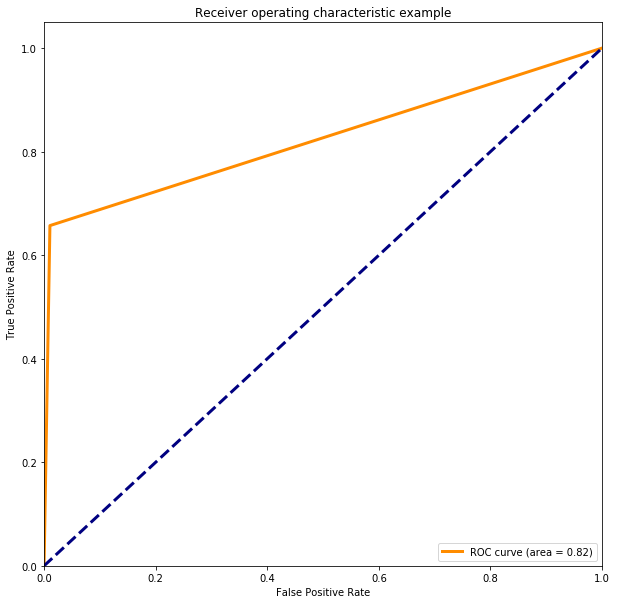

In [142]:
# plot ROC curve
def plt_ROC(y,Y):
    fpr, tpr, threshold = roc_curve(y, Y)  # get TPR and FPR
    roc_auc = auc(fpr, tpr) 

    plt.figure(figsize = (10, 6), dpi = 300)
    lw = 3
    plt.figure(figsize=(10, 10))
    plt.plot(fpr, tpr, color='darkorange',
             lw = lw, label='ROC curve (area = %0.2f)' % roc_auc)  # FPR as x，TPR as y
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    
plt_ROC(y_train, y_train_pred3)
plt.savefig('ROC for RF.jpg', dpi = 300)
plt.show()
plt_ROC(y_train, y_train_pred4)
plt.savefig('ROC for GBC.jpg', dpi = 300)
plt.show()

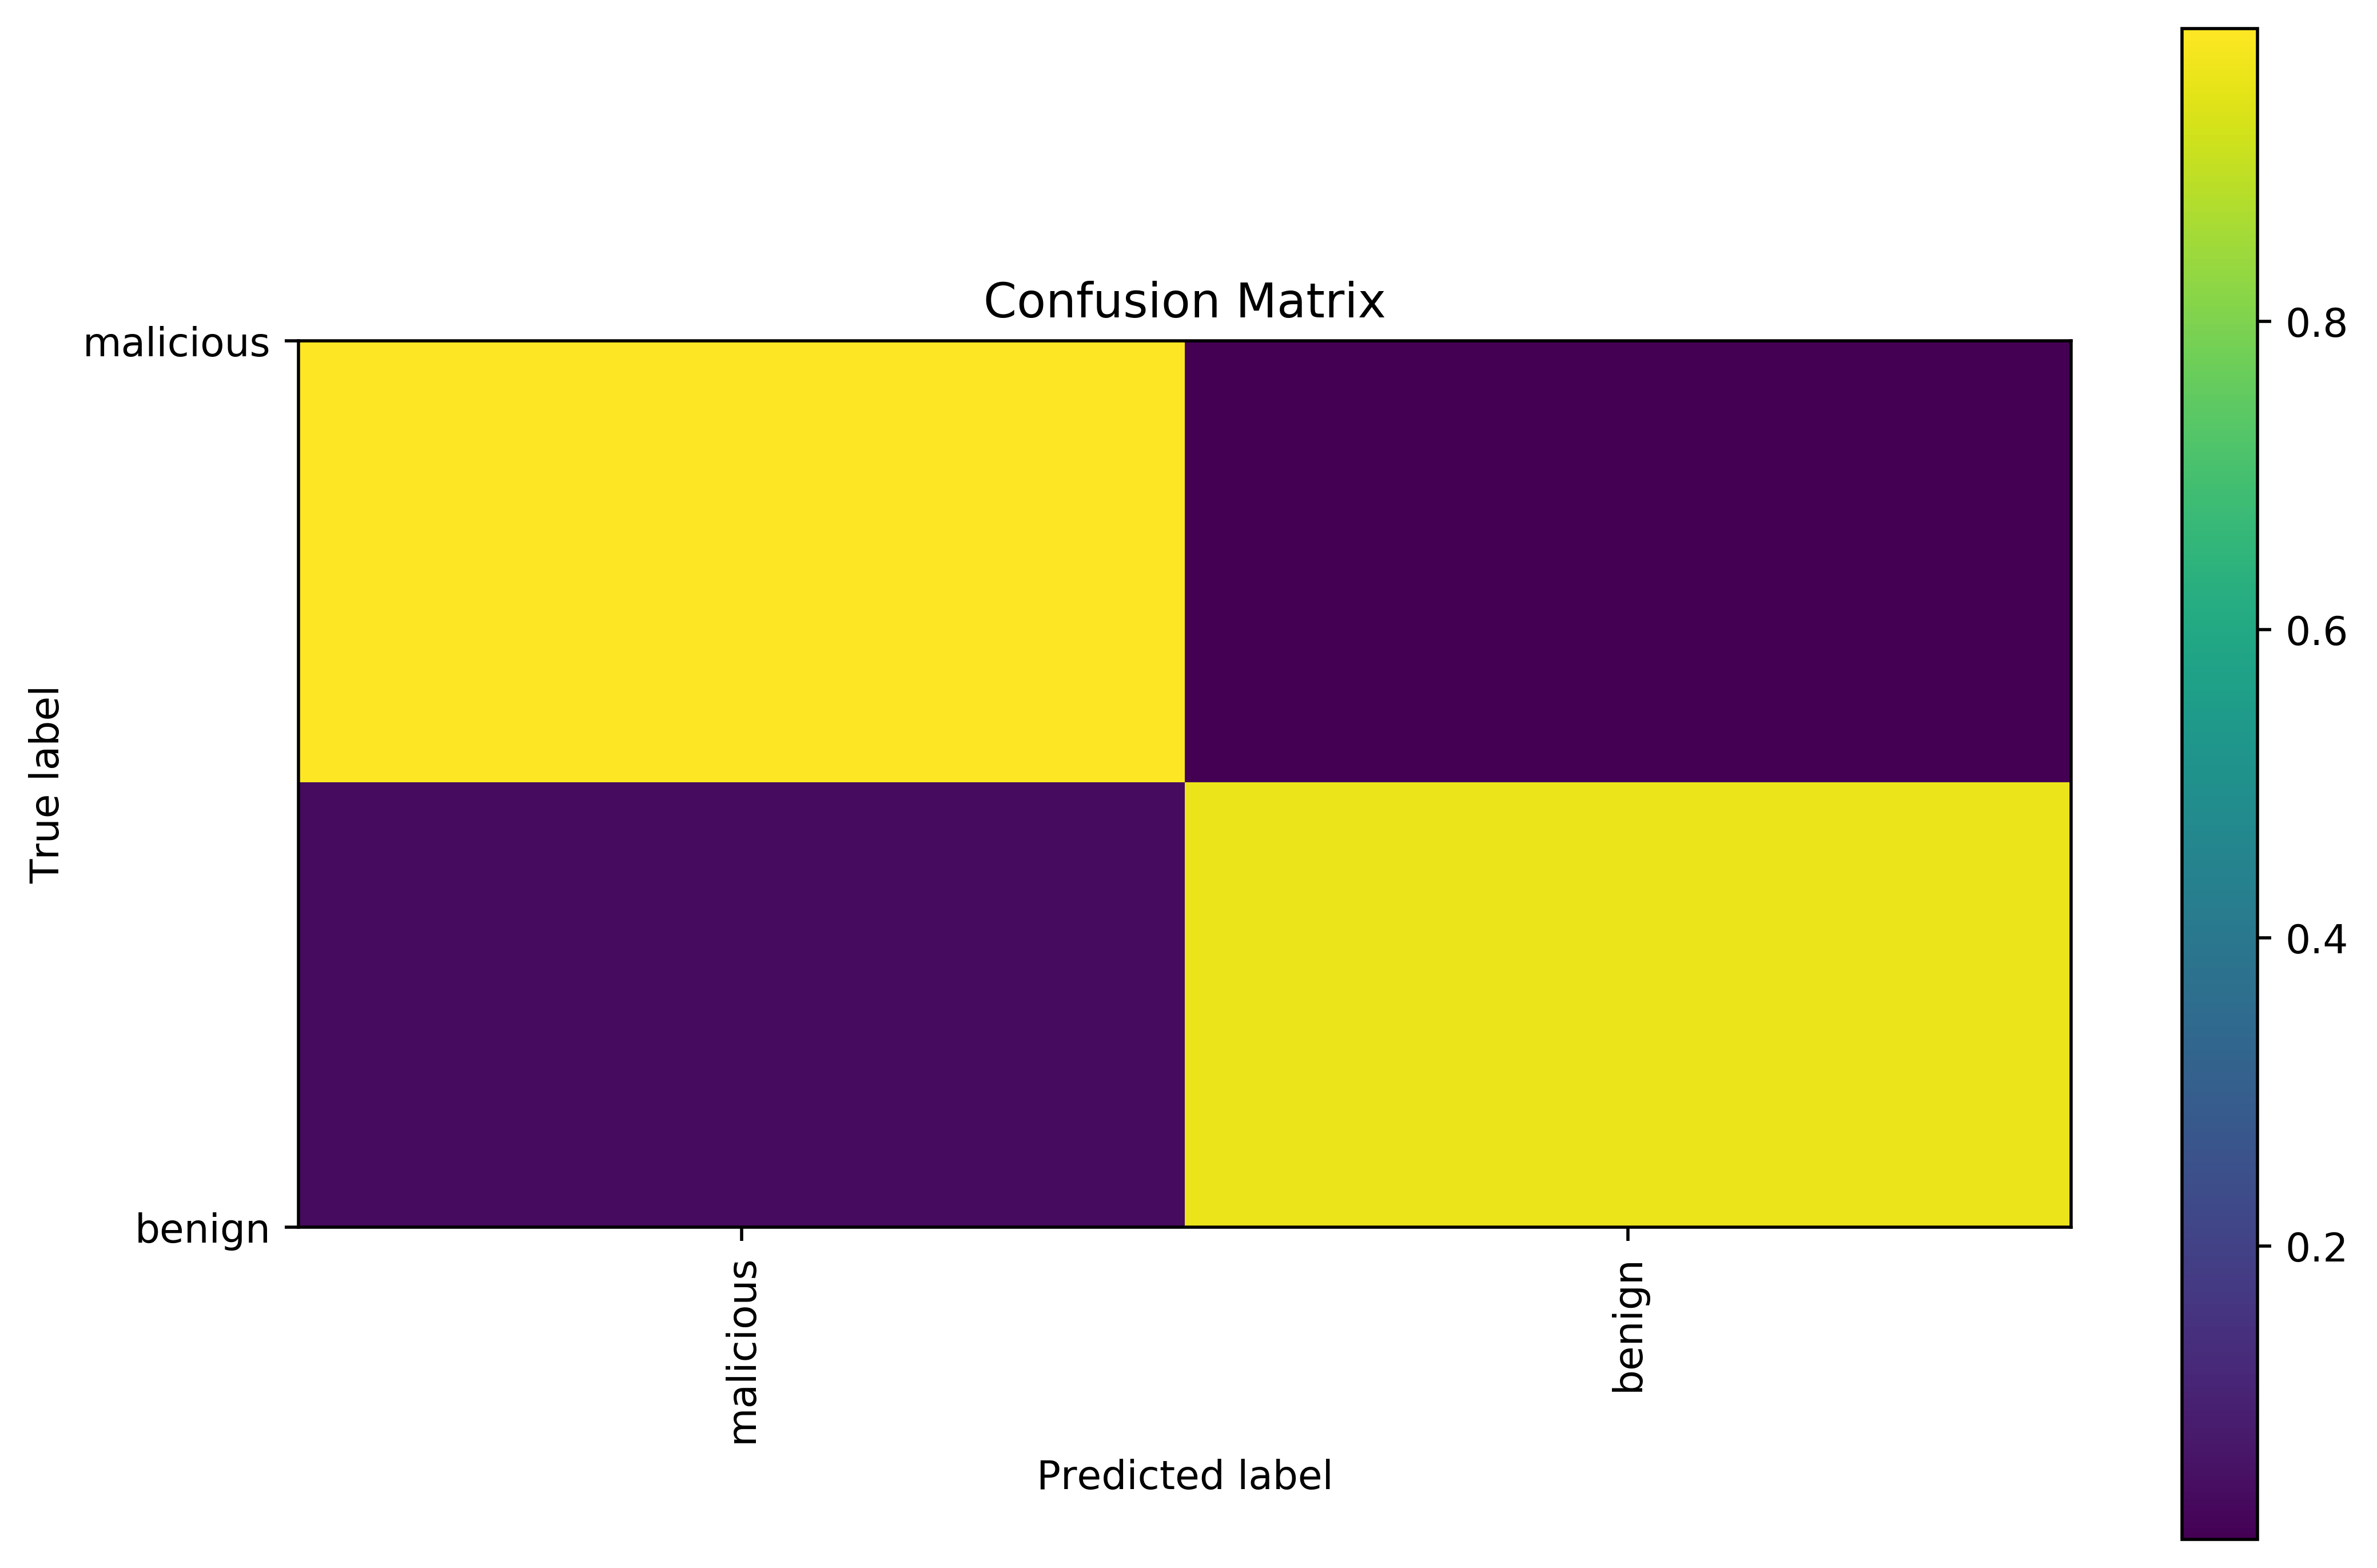

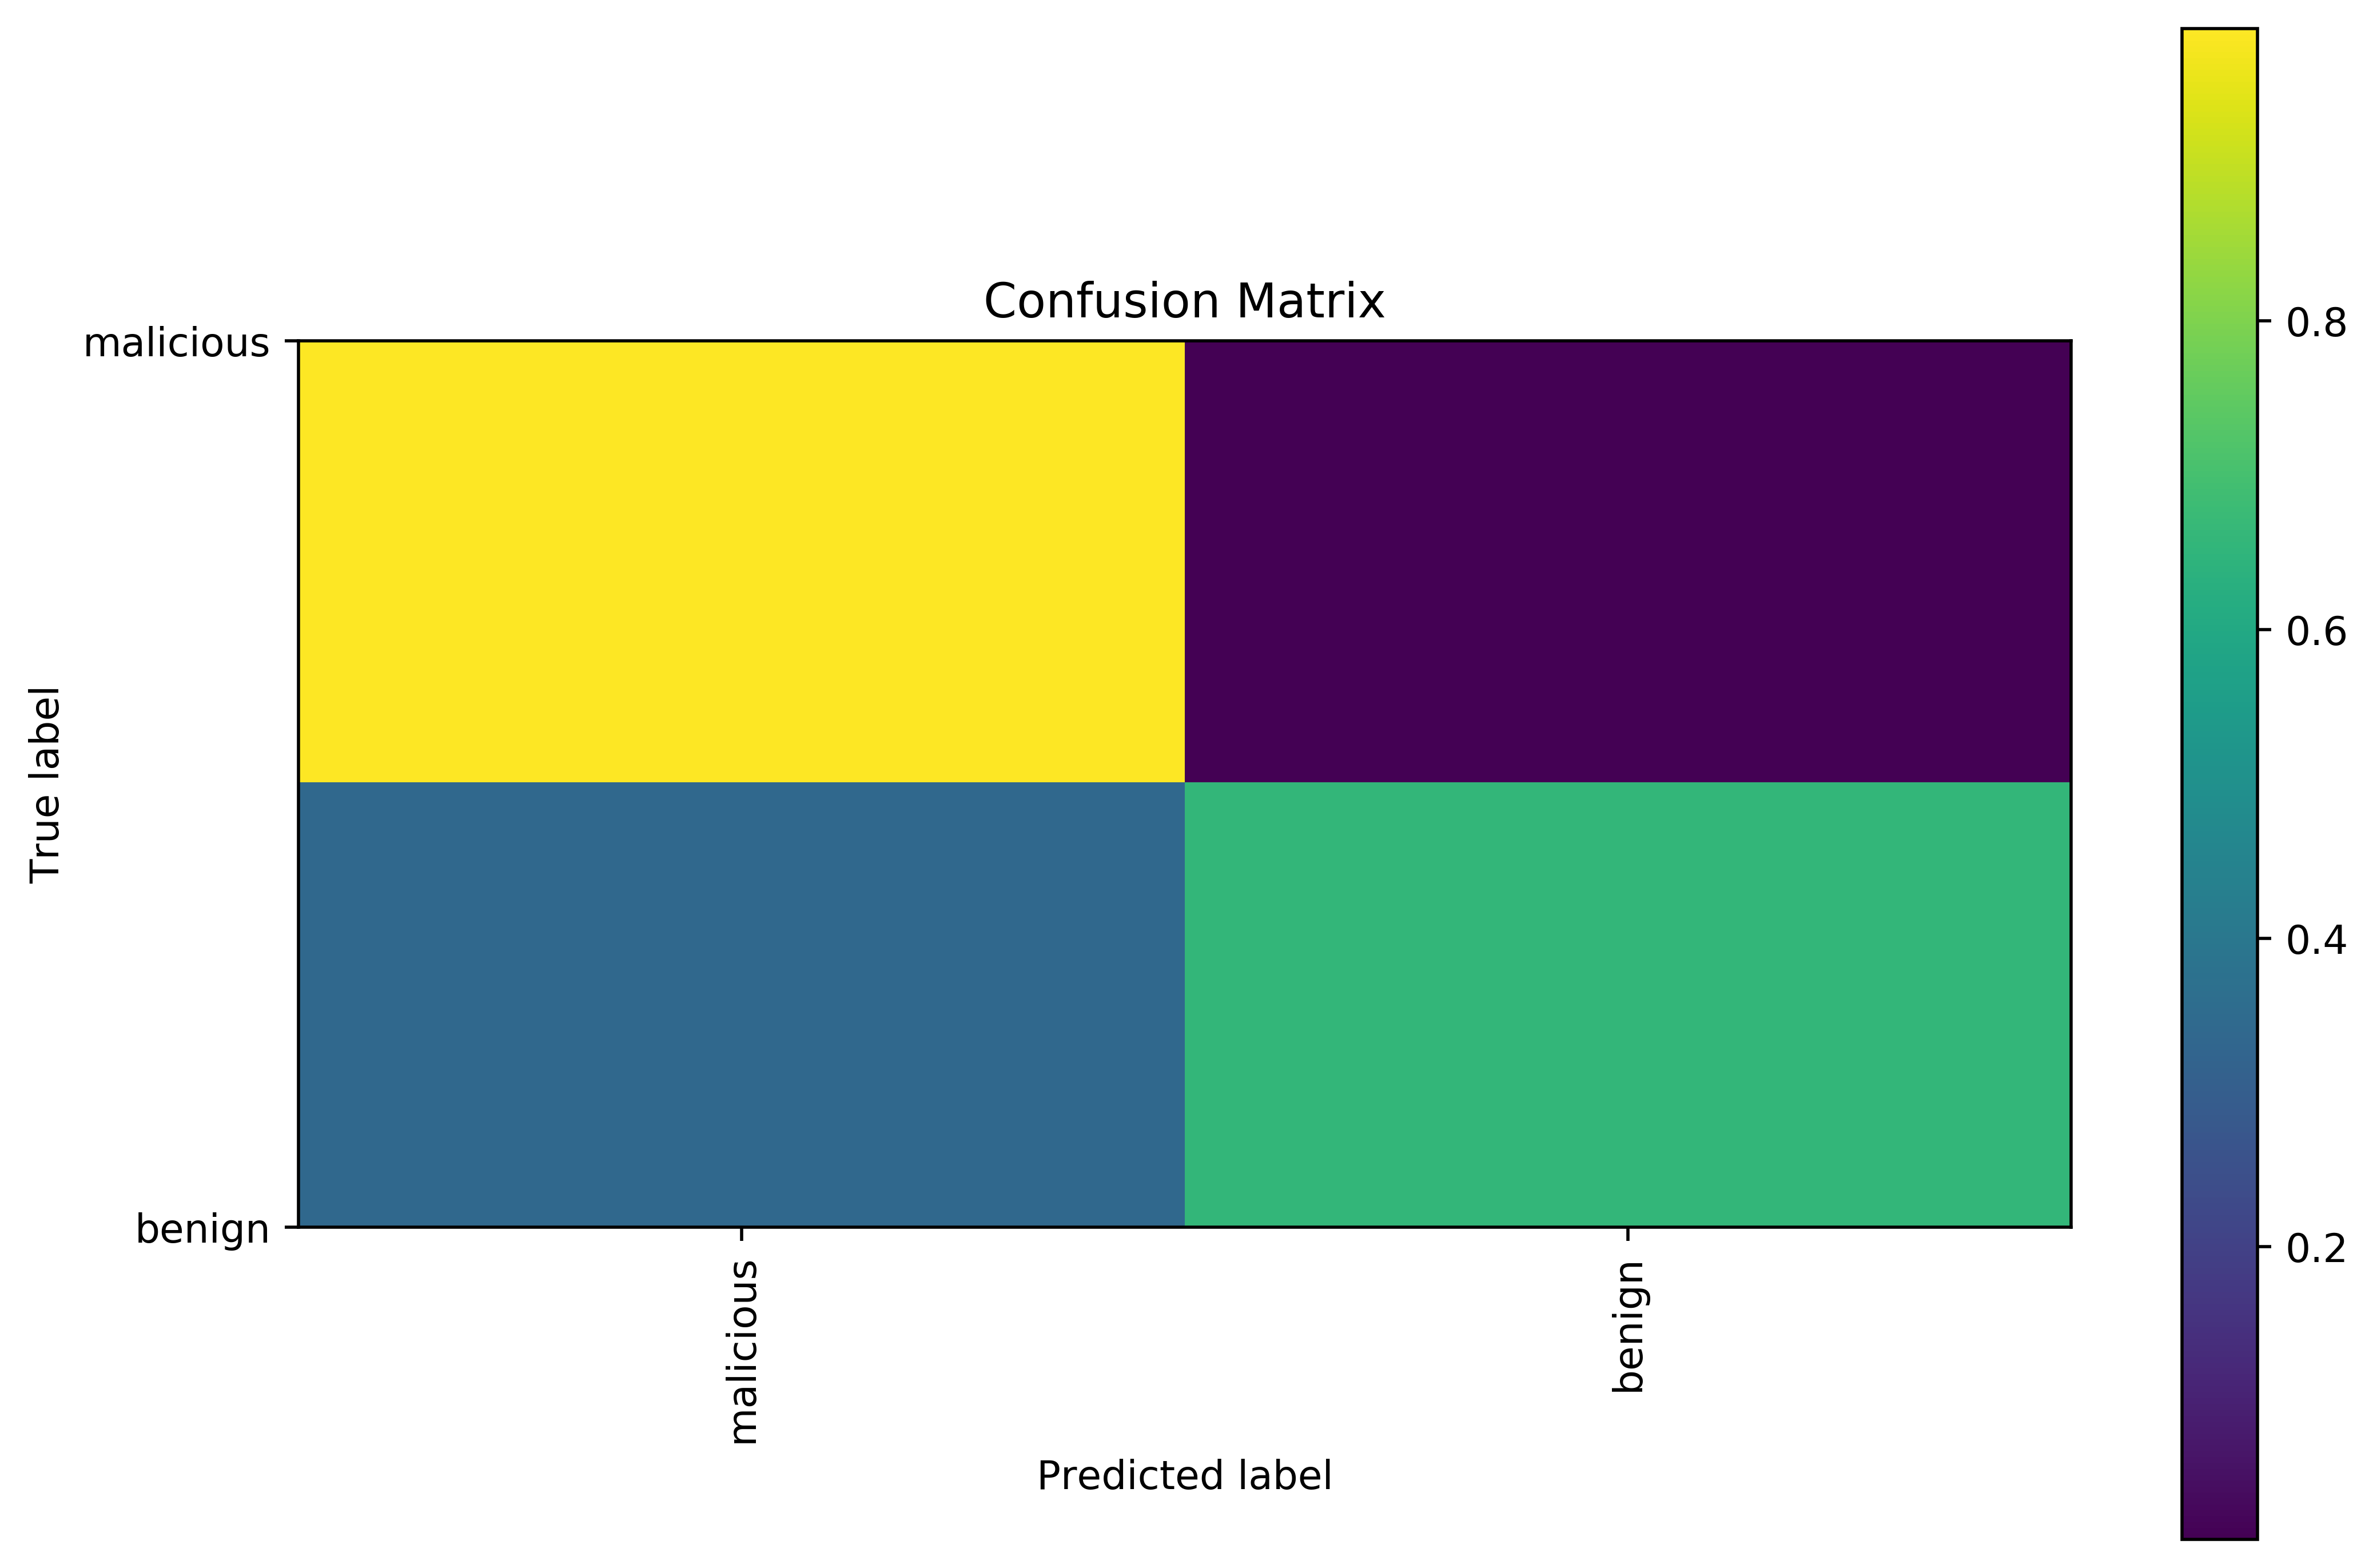

In [143]:
def plt_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]    # Normalize
    plt.figure(figsize = (10, 7), dpi = 500)
    plt.imshow(cm, interpolation='nearest')    
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)    
    plt.yticks(num_local, labels_name)    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_train, y_train_pred3)
plt_confusion_matrix(cm, ["malicious", "benign"], "Confusion Matrix")
plt.show()
cm = confusion_matrix(y_train, y_train_pred4)
plt_confusion_matrix(cm, ["malicious", "benign"], "Confusion Matrix")
plt.show()